In [17]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import os

# 打开图像
image_folder = '/Users/riverzhao/Project/Codec/3_experiment/tsinghua-codec-experiment/data/fix-color'
image_name = 'rendered-raw/experimenting_image_013.png'
raw_image = Image.open(os.path.join(image_folder, image_name))
image = raw_image

# feat: 调整颜色平衡 RGB
def adjustColorBalance(img, rRatio, gRatio, bRatio):
    # 转换为 numpy 数组
    image_array = np.array(img)

    # 分离 RGB 通道
    red, green, blue = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

    # 应用比例调整
    red = np.clip(red * rRatio, 0, 255)
    green = np.clip(green * gRatio, 0, 255)
    blue = np.clip(blue * bRatio, 0, 255)

    # 合并调整后的通道
    adjusted_image_array = np.stack([red, green, blue], axis=2).astype('uint8')

    # 转换回图像
    adjusted_image = Image.fromarray(adjusted_image_array)

    return adjusted_image

# feat: 调整亮度
def adjustBrightness(img, ratio):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(ratio)  # 增加亮度，参数>1增加亮度，<1降低亮度

# feat: 调整对比度
def adjustContrast(img, ratio):
    enhancer = ImageEnhance.Contrast(img)
    return enhancer.enhance(ratio)  # 增加对比度，参数>1增加对比度，<1降低对比度

# feat: 调整颜色饱和度
def adjustColor(img, ratio):
    enhancer = ImageEnhance.Color(img)
    return enhancer.enhance(ratio)  # 增加对比度，参数>1增加对比度，<1降低对比度


# feat: 画图
def drawImage(images):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(6 * num_images, 6))

    for ax, (img, title) in zip(axes, images):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.show()

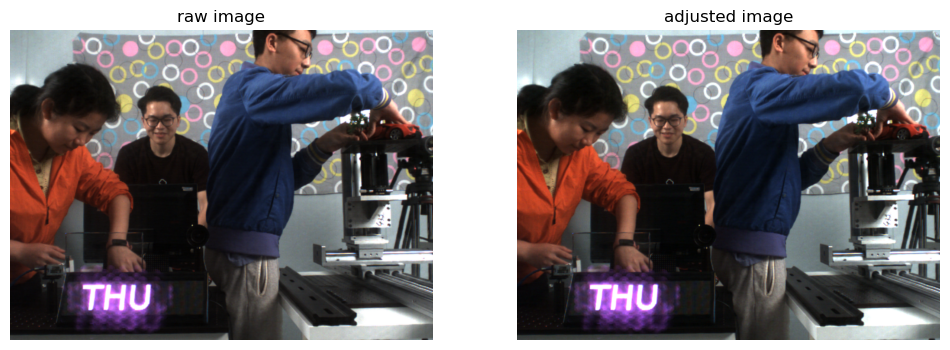

In [18]:
image = adjustColorBalance(image, 0.99, 1.01, 1.01)
image = adjustBrightness(image, 1.05)
image = adjustColor(image, 1.05)
drawImage([
    (raw_image, "raw image"),
    (image, "adjusted image"),
])

In [19]:
# 保存调整后的图像
output_name = 'experimenting_image_fix_color_python.png'
image.save(os.path.join(image_folder, 'fix-color-rendered-raw', output_name))